# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**
* Special Exception for Lab-05: \\
1) you can use pytorch instead of tensorflow. \\
2) So replace pytorch instead of tensorflow in GIVEN code.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Q1) Display following stages
## a) Load 'AI_news01.png' [GIVEN]

In [2]:
# Read image in TensorFlow
img_path = 'AI_news01.png'
img0 = cv.imread(img_path)
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = tf.convert_to_tensor(img, dtype=tf.uint16)

In [3]:
print(img.shape)

(650, 917)


In [4]:
print(img.dtype)

<dtype: 'uint16'>


In [5]:
# Define kernel
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

In [6]:
# Change data type of image using TensorFlow and apply 1x1 identity kernal
img_a = tf.cast(img, tf.float32)  # Convert image to float32
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

img_a=tf.cast(img_a, tf.uint8)

In [7]:
# Print information about the image
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))

Original Data_type is <dtype: 'uint16'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'uint8'>
Image Size is (1, 650, 917, 1)
Image min and max are (34, 255)


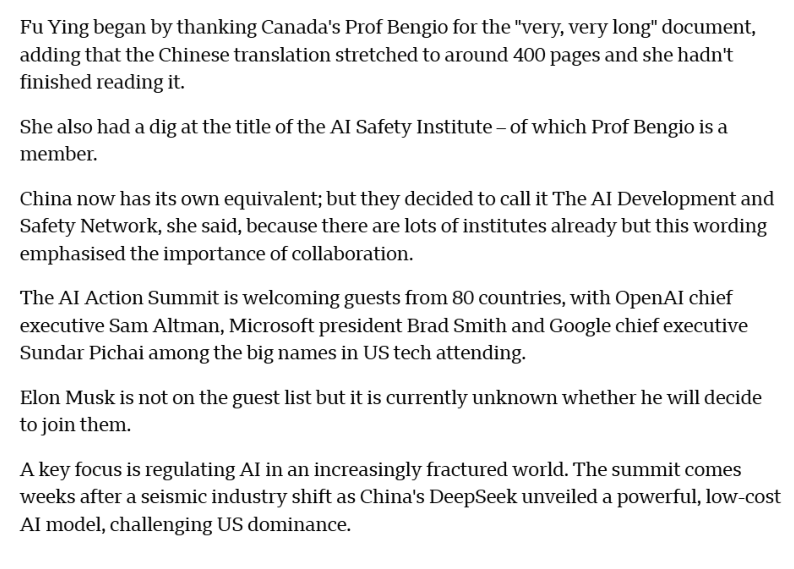

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()

## b) Load 'AI.png' [GIVEN]


In [9]:
# Read image in TensorFlow
img_path = 'AI.png'
img0 = cv.imread(img_path)
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = tf.convert_to_tensor(img, dtype=tf.uint16)

In [10]:
# Change data type of image using TensorFlow and apply 1x1 identity kernal
img_b = tf.cast(img, tf.float32)  # Convert image to float32
img_b = tf.nn.conv2d( tf.reshape(img_b, (1,img_b.shape[0],img_b.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

img_a=tf.cast(img_a, tf.uint16)
img_b=tf.cast(img_b, tf.uint16)

In [11]:
print(img_b.shape)

(1, 18, 28, 1)


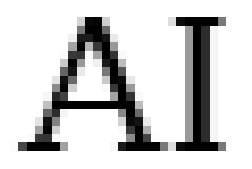

In [12]:
plt.figure(figsize=(3,3))
plt.imshow(tf.squeeze(img_b), cmap='gray')
plt.axis('off')
plt.show()

#c) Threshold both images at $(intensity<=228)$ intensity value and visulize the both outputs [2 Marks]

Store it both output images as $img\_a1$ and $img\_b1$ respectively. \\
Use ONLY tensorflow/pytorch operations.

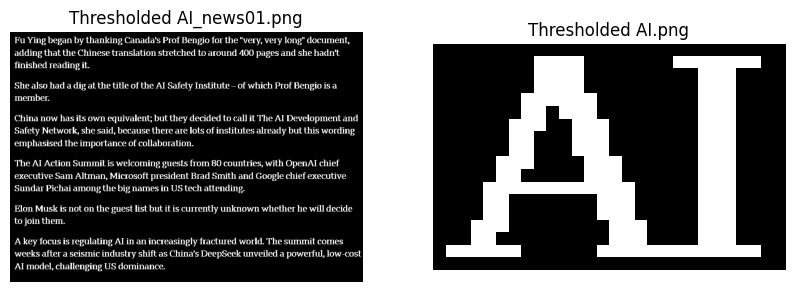

In [13]:
thresholdValue=228
img_a1 = tf.where(img_a < thresholdValue, 1.0, 0.0)
img_b1 = tf.where(img_b < thresholdValue, 1.0, 0.0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Thresholded AI_news01.png")
plt.imshow(tf.squeeze(img_a1), cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Thresholded AI.png")
plt.imshow(tf.squeeze(img_b1), cmap="gray")
plt.axis("off")

plt.show()

#d) Convolve $img\_a1$ with $img\_b1$ and threshold the output at $(maximum\_of\_output - 25)$ and store the output in $img\_d$. Visualize it. [4 Marks]

Use ONLY tensorflow/pytorch operations.

img_a1 shape: (1, 650, 917, 1)
img_b1 shape: (1, 18, 28, 1)


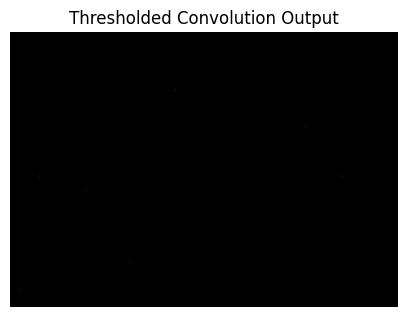

Number of non-zero pixels: 7


In [16]:
print("img_a1 shape:", img_a1.shape)
print("img_b1 shape:", img_b1.shape)

# No need to reshape img_a1, it's already (1, height, width, 1)
img_a1_reshaped = img_a1

img_b1_reshaped = tf.reshape(img_b1, (img_b1.shape[1], img_b1.shape[2], 1, 1))

# Perform convolution
img_d = tf.nn.conv2d(img_a1_reshaped, img_b1_reshaped, strides=[1, 1, 1, 1], padding='SAME')

# Apply thresholding
threshold_d = tf.reduce_max(img_d) -25
img_d = tf.where(img_d <= threshold_d, 0.0, 1.0)

# Display result
plt.figure(figsize=(5, 5))
plt.imshow(tf.squeeze(img_d), cmap="gray")
plt.axis("off")
plt.title("Thresholded Convolution Output")
plt.show()

# Convert TensorFlow tensor to NumPy array
img_d_numpy = img_d.numpy()  # If using eager execution (default in TF 2.x)

# Count non-zero pixels
nonZeroCount = np.count_nonzero(img_d_numpy)
print("Number of non-zero pixels:", nonZeroCount)


#e) Convolve this output with reflection of AI (around origin) and visualize it. [4 Marks]
### [Hint: Use $tf.reverse(x,axis)$ function]

Use ONLY tensorflow/pytorch operations.

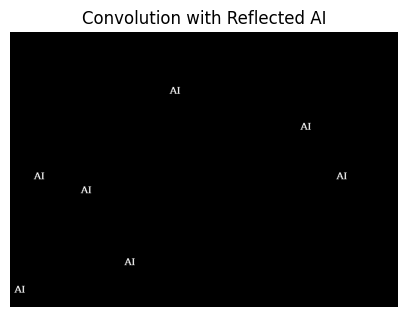

In [17]:
img_b1_reflected = tf.reverse(img_b1_reshaped, axis=[0, 1])

# Perform convolution
img_e = tf.nn.conv2d(img_d, img_b1_reflected, strides=[1, 1, 1, 1], padding='SAME')

# Display img_e
plt.figure(figsize=(5, 5))
plt.imshow(tf.squeeze(img_e), cmap="gray")
plt.axis("off")
plt.title("Convolution with Reflected AI")
plt.show()
